# Соревнования по распознаванию рукописных цифр на Kaggle

Пример кода для отправки решения в соревнование Kaggle - https://www.kaggle.com/c/digit-recognizer/data

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

##Загружаем необходимые библиотеки и модули

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
#from scipy.misc import toimage
%matplotlib inline

## Устанавливаем Kaggle API

In [ ]:
file = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!ls

kaggle.json  sample_data


Копируем токен в каталог .kaggle

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

## Загружаем данные с сайта Kaggle

In [ ]:
!kaggle competitions download -c digit-recognizer

 85% 13.0M/15.3M [00:01<00:00, 14.4MB/s]
100% 15.3M/15.3M [00:01<00:00, 9.25MB/s]


In [ ]:
!ls

digit-recognizer.zip  sample_data


Распакуем test.csv и train.csv

In [ ]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Проверяем формат данных

Данные для обучения

In [ ]:
!head train.csv

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel1

Данные для тестирования

In [ ]:
!head test.csv

pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pix

Пример файла с решением

In [ ]:
!head sample_submission.csv

ImageId,Label
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## Подготовка данных для обучения сети

Загружаем данные для обучения из файла

In [ ]:
train_dataset = np.loadtxt('train.csv', skiprows=1, delimiter=',') # пропускаем заголовок, delimiter - разделитель данных

In [ ]:
train_dataset[453:455]

array([[5., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.]])

Выделяем данные для обучения

In [ ]:
# В x_train записываем все данные из train_dataset, кроме первого столбца
# Для выбора элементов массива Numpy в Python (slicing) используются квадратные скобки
# В скобках два диапазона через запятую: строки и столбцы
# Диапазон указывается через двоеточие
# Например, train_dataset[1:10, 5:20] - выбрать строки с 1 по 10 (не включая)
# и столбцы с 5 по 20 (не включая)
# Если начало диапазона не указано, значит выбирается с 0 элемента
# Если конец не указан, значит выбирается до посленего элемента
# train_dataset[:, 1:] - для строк не указаны ни начальный, ни конечный номер,
# значит выбираются все строки. Для столбцов диапазон 1: , значит выбираются
# столбцы начиная с 1 и до последнего (в столбце 0 размещены метки)
x_train = train_dataset[:, 1:]

Нормализуем данные для обучения

In [ ]:
x_train /= 255.0

In [ ]:
x_train.shape

(42000, 784)

In [ ]:
x_train[:3, 445:460]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07843137, 0.79607843],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.63921569, 0.99607843,
        0.99607843, 0.99607843, 0.11372549, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

Выделяем правильные ответы из столбца с индексом [0]

In [ ]:
y_train = train_dataset[:, 0]

In [ ]:
y_train[:10]

array([1., 0., 1., 4., 0., 0., 7., 3., 5., 3.])

Преобразуем ответы в формат one hot encoding

In [ ]:
y_train = utils.to_categorical(y_train)

In [ ]:
y_train[:4]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Создаем нейронную сеть

**Создаем последовательную модель**

**Добавляем уровни сети**

Архитектуру сети взяли по ссылке - https://en.wikipedia.org/wiki/MNIST_database


In [ ]:
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Скрытые слои
model.add(Dense(800, activation="relu"))
#model.add(Dropout(0.1))
model.add(Dense(800, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 800)               640800    
                                                                 
 dense_2 (Dense)             (None, 800)               640800    
                                                                 
 dense_3 (Dense)             (None, 10)                8010      
                                                                 
Total params: 1917610 (7.32 MB)
Trainable params: 1917610 (7.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


**Компилируем сеть**

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

##Callbacks

In [ ]:
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

modelCheckpoint = ModelCheckpoint("model-Dense.h5",
                                  monitor='val_accuracy',
                                  verbose=2,
                                  save_best_only=True)

In [ ]:
callbacks = [modelCheckpoint]

## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train,
                    y_train,
                    batch_size=512,
                    epochs=20,
                    validation_split=0.2,
                    callbacks = callbacks,
                    verbose=1)

Epoch 1/20
63/66 [===========================>..] - ETA: 0s - loss: 0.3915 - accuracy: 0.8858
Epoch 00001: val_accuracy improved from -inf to 0.94964, saving model to model-Dense.h5
66/66 [==============================] - 4s 18ms/step - loss: 0.3828 - accuracy: 0.8881 - val_loss: 0.1563 - val_accuracy: 0.9496
Epoch 2/20
 8/66 [==>...........................] - ETA: 0s - loss: 0.1274 - accuracy: 0.9624

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/66 [============================>.] - ETA: 0s - loss: 0.1162 - accuracy: 0.9647
Epoch 00002: val_accuracy improved from 0.94964 to 0.95714, saving model to model-Dense.h5
66/66 [==============================] - 1s 10ms/step - loss: 0.1163 - accuracy: 0.9646 - val_loss: 0.1335 - val_accuracy: 0.9571
Epoch 3/20
64/66 [============================>.] - ETA: 0s - loss: 0.0718 - accuracy: 0.9775
Epoch 00003: val_accuracy improved from 0.95714 to 0.97131, saving model to model-Dense.h5
66/66 [==============================] - 1s 8ms/step - loss: 0.0715 - accuracy: 0.9776 - val_loss: 0.0938 - val_accuracy: 0.9713
Epoch 4/20
60/66 [==========================>...] - ETA: 0s - loss: 0.0437 - accuracy: 0.9868
Epoch 00004: val_accuracy did not improve from 0.97131
66/66 [==============================] - 0s 7ms/step - loss: 0.0439 - accuracy: 0.9866 - val_loss: 0.0900 - val_accuracy: 0.9705
Epoch 5/20
59/66 [=========================>....] - ETA: 0s - loss: 0.0282 - accuracy: 0.9916
Epoch 0000

In [ ]:
model.load_weights('model-Dense.h5')

## Визуализация качества обучения


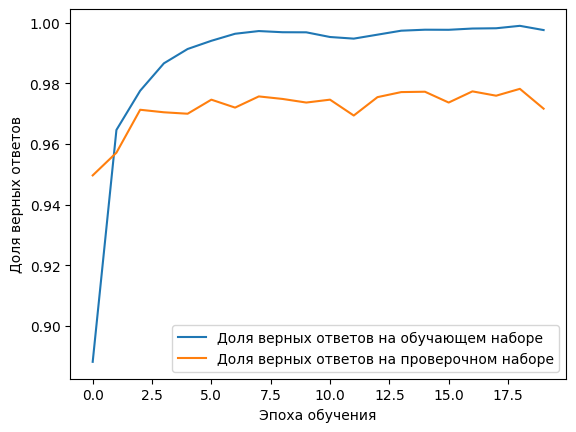

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Загружаем данные для распознавания

In [ ]:
test_dataset = np.loadtxt('test.csv', skiprows=1, delimiter=",")

In [ ]:
test_dataset.shape

(28000, 784)

In [ ]:
test_dataset[:3, 445:460]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,  42., 116., 173., 253.,
        253., 253., 253., 253.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 252., 166.,   0.,
          0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.]])

Нормализация данных

In [ ]:
x_test = test_dataset / 255.0

In [ ]:
x_test[:3, 445:460]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.16470588, 0.45490196, 0.67843137,
        0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.99215686],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.98823529, 0.65098039,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

## Запускаем распознавание рукописных цифр из тестового набора данных

In [ ]:
predictions = model.predict(x_test)

875/875 [==============================] - 2s 2ms/step


In [ ]:
predictions[:3]

array([[3.4857640e-16, 2.4738047e-16, 1.0000000e+00, 1.1042974e-14,
        1.3584995e-16, 1.6508964e-18, 2.3605109e-17, 2.1554471e-14,
        4.1435864e-16, 4.0257300e-18],
       [1.0000000e+00, 4.2004800e-13, 1.4563770e-11, 1.7382367e-16,
        5.7649896e-17, 4.2327589e-11, 1.3301044e-11, 1.2905191e-12,
        7.2624065e-16, 6.6417778e-14],
       [5.3769250e-10, 8.0289153e-09, 1.1591597e-09, 2.6815798e-09,
        3.3302698e-05, 2.3194127e-09, 1.3974202e-11, 7.8896214e-08,
        4.2571489e-07, 9.9996614e-01]], dtype=float32)

Преобразуем результаты распознавания из формата one hot encoding в цифры

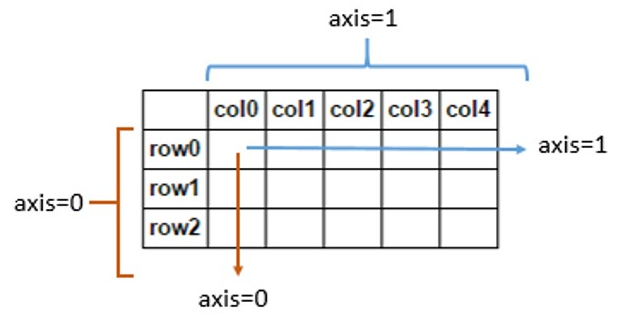

In [ ]:
predictions = np.argmax(predictions, axis=1)

In [ ]:
predictions[:3]

array([2, 0, 9])

In [ ]:
predictions.shape

(28000,)

In [ ]:
predictions.shape[0]

28000

## Готовим файл с решением для Kaggle

In [ ]:
out = np.column_stack((range(1, predictions.shape[0]+1), predictions)) # функция для генерации номеров + слияние массивов

In [ ]:
out[:5]

array([[1, 2],
       [2, 0],
       [3, 9],
       [4, 0],
       [5, 3]])

Записываем результаты в файл

https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html

https://pyprog.pro/io_functions/savetxt.html

In [ ]:
np.savetxt('submission.csv', out, header="ImageId,Label",
            comments="", fmt="%d,%d")

In [ ]:
!head submission.csv

ImageId,Label
1,2
2,0
3,9
4,0
5,3
6,7
7,0
8,3
9,0


## Отправляем решение на соревнование

In [ ]:
!kaggle competitions submit -c digit-recognizer -m "Submition from Colab" -f submission.csv

100% 208k/208k [00:03<00:00, 70.9kB/s]
Successfully submitted to Digit Recognizer

Посмотрим на достигнутый рейтинг
  

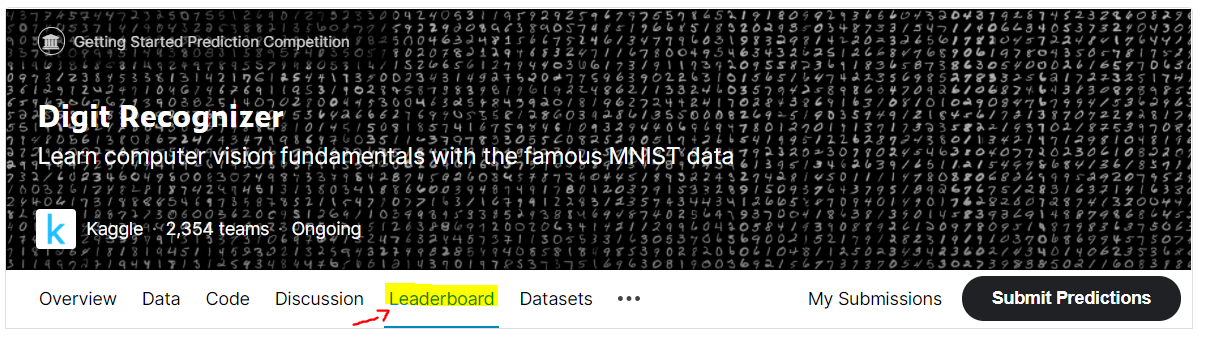

https://www.kaggle.com/c/digit-recognizer/data

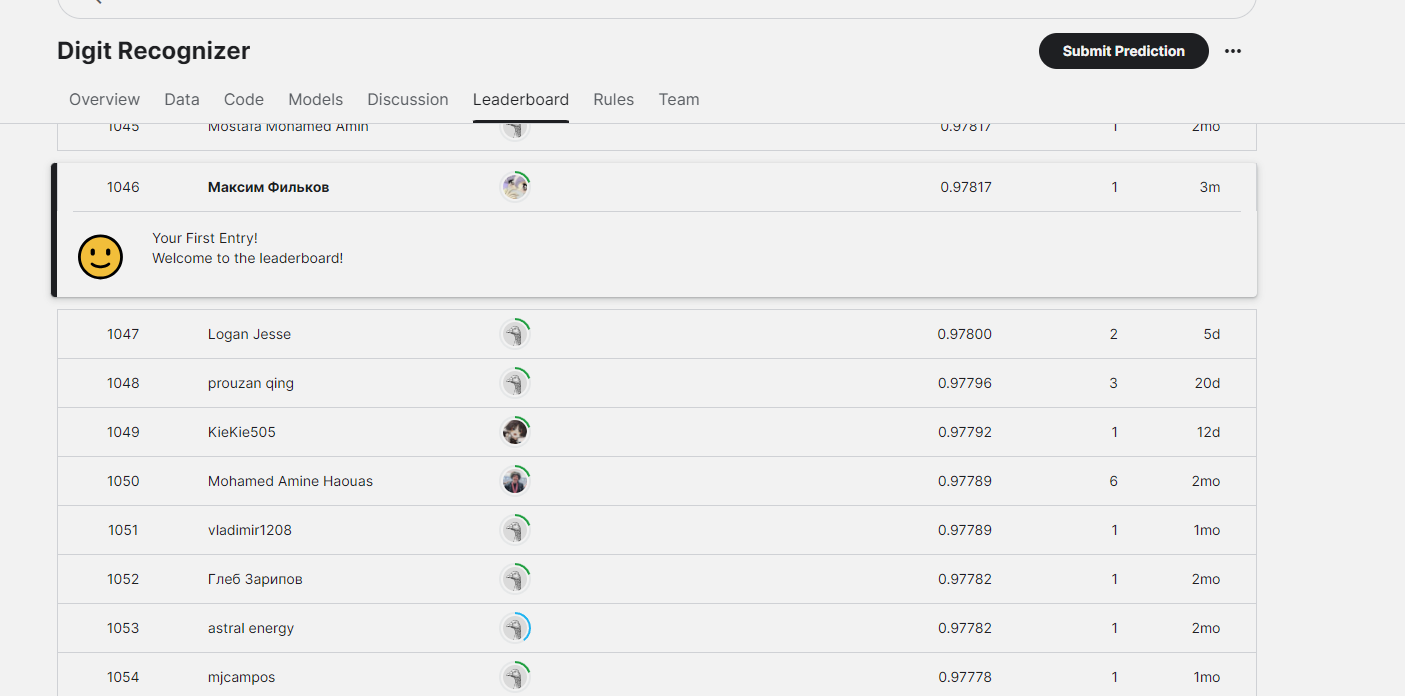

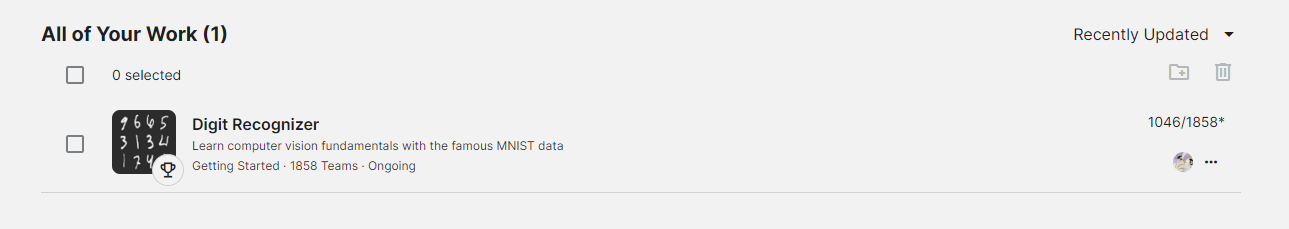

## Домашнее задание

1. Используйте шаблон ноутбука, чтобы отправить решение на Kaggle.
2. Попробуйте изменить нейронную сеть, чтобы улучшить качество решения:
    * Изменяйте количество нейронов в слоях
    * Добавляйте новые скрытые слои
    * Изменяйте количество эпох обучения
    * Изменяйте размер мини-выборки (batch_size)
3. Во время обучения следите, чтобы не возникло переобучения.
4. После подбора лучших гиперпараметров, обучите сеть еще раз на полном объеме данных без разделения на обучающий и проверочный наборы.
5. Составьте отчет, который включает:
     * Место в соревновании, которое вам удалось достичь
     * Описание архитектуры нейронной сети и гиперпараметров обучения
     * График качества обучения на обучающем и проверочном наборах данных

